In [29]:
import pandas as pd
import seaborn as sns
import quandl
quandl.ApiConfig.api_key = "RmfKxsj-RPwgAJobtSyJ"

Load amfi codes and mutual fund names

In [6]:
amfi_codes = pd.read_csv('D:\DataScience\Kaggle Problems\India_MutualFunds\AMFI-datasets-codes.csv',
                         sep = ',',
                         header = None, 
                         names = ('amfi_code','Fund_Name'))
amfi_codes.head(3)

,amfi_code,Fund_Name
0,AMFI/135762,Axis Mutual Fund - Axis Children's Gift Fund -...
1,AMFI/135765,Axis Mutual Fund - Axis Children's Gift Fund -...
2,AMFI/135759,Axis Mutual Fund - Axis Children's Gift Fund -...


In [36]:
def getQuandlData(code_index):
    code_val = amfi_codes.loc[code_index,'amfi_code']
    amfi = quandl.get(code_val)
    #amfi['Code'] = code_val.split('/')[1]
    amfi['Fund_Name'] = amfi_codes.loc[code_index,'Fund_Name']
    return amfi

In [41]:
amfi_dataset = pd.DataFrame()
for x in range(0,50):
    amfi = getQuandlData(x)
    amfi_dataset = amfi_dataset.append(amfi)
    
amfi_dataset.describe()

,Net Asset Value,Repurchase Price,Sale Price
count,18853.000000,18853.000000,18853.000000
mean,80.379799,79.623026,80.379799
std,141.588138,140.189108,141.588138
min,10.133200,9.829200,10.133200
25%,14.121400,14.052700,14.121400
50%,23.150000,22.920000,23.150000
75%,109.887000,108.464600,109.887000
max,821.900000,813.680000,821.900000


Check for null values

In [42]:
amfi_dataset.reset_index(inplace = True)
amfi_dataset.head(5)

,Date,Net Asset Value,Repurchase Price,Sale Price,Fund_Name
0,2016-08-30,11.0348,11.0348,11.0348,Axis Mutual Fund - Axis Children's Gift Fund -...
1,2016-08-31,11.0752,11.0752,11.0752,Axis Mutual Fund - Axis Children's Gift Fund -...
2,2016-09-01,11.0562,11.0562,11.0562,Axis Mutual Fund - Axis Children's Gift Fund -...
3,2016-09-02,11.0805,11.0805,11.0805,Axis Mutual Fund - Axis Children's Gift Fund -...
4,2016-09-06,11.1672,11.1672,11.1672,Axis Mutual Fund - Axis Children's Gift Fund -...


In [43]:
print('Check for na values')
for x in range(0,4):
    print(amfi_dataset.columns[x], "--", sum(amfi_dataset.iloc[:,x].isna()))

Check for na values
Date -- 0
Net Asset Value -- 0
Repurchase Price -- 0
Sale Price -- 0


In [44]:
print('Check for null values')
for x in range(0,4):
    print(amfi_dataset.columns[x], "--", sum(amfi_dataset.iloc[:,x].isna()))

Check for null values
Date -- 0
Net Asset Value -- 0
Repurchase Price -- 0
Sale Price -- 0


In [45]:
#amfi_dataset.groupby(['Fund_Name']).count().plot()

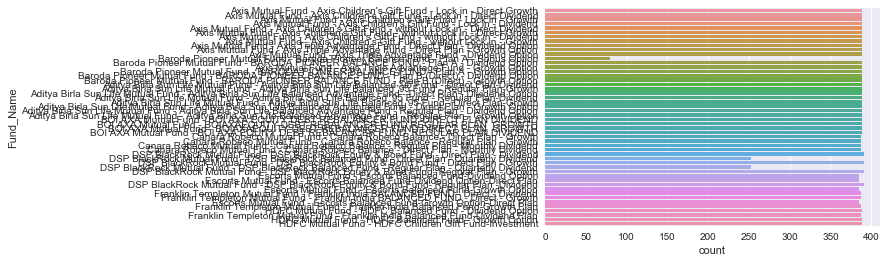

In [48]:
sns.set(style="darkgrid")
ax = sns.countplot(y="Fund_Name", data=amfi_dataset)

In [47]:
amfi_dataset.head()

,Date,Net Asset Value,Repurchase Price,Sale Price,Fund_Name
0,2016-08-30,11.0348,11.0348,11.0348,Axis Mutual Fund - Axis Children's Gift Fund -...
1,2016-08-31,11.0752,11.0752,11.0752,Axis Mutual Fund - Axis Children's Gift Fund -...
2,2016-09-01,11.0562,11.0562,11.0562,Axis Mutual Fund - Axis Children's Gift Fund -...
3,2016-09-02,11.0805,11.0805,11.0805,Axis Mutual Fund - Axis Children's Gift Fund -...
4,2016-09-06,11.1672,11.1672,11.1672,Axis Mutual Fund - Axis Children's Gift Fund -...
